# 逻辑模型实际数据分析

欢迎来到**人工智能与深度学习**课程！在实践中，诸多重要经济问题涉及到分类数据的分析，比如，如何基于当前房地产运行指标预测我国经济是否会产生系统性风险；如何根据我国当年的经济运行指标来确定次年是否实施量化宽松的经济政策；如何基于当日股票技术指标对下一交易日的涨跌情况进行预测。作为分类数据分析的基础，逻辑回归在统计学和深度学习中都具有重要意义。在这个例子中，我们将在一个真实的股市数据中运用逻辑回归模型，建立股价涨跌的分类模型，并通过梯度下降法进行参数估计。

**学习目标**：在此项目中，我们将基于逻辑回归进行一个简单的研究。完成这项作业后，您将知道：
* 如何进行简单的数据预处理。
* 如何通过基于梯度的方法估计模型参数。
* 梯度下降法的工作原理。


## 目录
* [1 - 第三方包导入](#1)
* [2 - 探索性数据分析](#2)
* [3 - 建模分析](#3) 

<a name='1'></a>
## 1- 第三方包导入

为了数据分析任务，我们需要导入一些**Python**包，其中数据分析最常用的包是**numpy**（np）和**pandas**（pd），画图常用的包有**matplotlib**和**seaborn**。

In [7]:
import numpy as np # 用于数值计算
import pandas as pd # 用于导入和处理数据
import matplotlib.pyplot as plt # 用于画图
import time # 用于计时

# 设置字体为支持中文的字体
plt.rcParams['axes.unicode_minus'] = False # 保证负号正常显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # macOS 系统

<a name='2'></a>
## 2 - 探索性数据分析

首先，我们使用**pandas**读取MT_daily.xlsx数据文件（贵州茅台2023年1月3日至2024年2月28日的日度股市数据），该数据库总共包含520条数据，用来建立 Logit 回归模型。

下面我们读取并展示部分数据，建立对所用数据的基础认识。

In [4]:
df = pd.read_excel('MT_daily.xlsx') # 读取数据
df # 显示数据，但请注意在.py文件中不能这样显示数据，要使用print(df)

,交易日期,开盘价(元),最高价(元),最低价(元),收盘价(元),收盘价(前复权)(元),收盘价(后复权)(元),涨跌(元),涨跌幅(%),成交量(股),成交额(元),换手率(%),PE市盈率,PB市净率,PS市销率,PCF市现率,总股本(股),总市值(元),流通股本(股),流通市值(元)
0,2025-02-28,1485.50,1528.38,1482.00,1500.79,1500.79,10843.10,15.23,1.03,5612895,8.475738e+09,0.45,22.80,7.93,11.20,-453.91,1256197800,1885289096262,1256197800,1885289096262
1,2025-02-27,1460.02,1489.90,1454.00,1485.56,1485.56,10733.06,25.55,1.75,4976217,7.368002e+09,0.40,22.57,7.85,11.08,-449.30,1256197800,1866157203768,1256197800,1866157203768
2,2025-02-26,1455.45,1464.96,1445.00,1460.01,1460.01,10548.47,6.01,0.41,2636609,3.835949e+09,0.21,22.18,7.72,10.89,-441.58,1256197800,1834061349978,1256197800,1834061349978
3,2025-02-25,1470.01,1473.39,1452.00,1454.00,1454.00,10505.04,-25.07,-1.70,2838743,4.142814e+09,0.23,22.09,7.68,10.85,-439.76,1256197800,1826511601200,1256197800,1826511601200
4,2025-02-24,1488.00,1499.52,1474.00,1479.07,1479.07,10686.17,-9.14,-0.61,3474373,5.157907e+09,0.28,22.47,7.82,11.04,-447.34,1256197800,1858004480046,1256197800,1858004480046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2024-01-08,1661.00,1662.00,1640.01,1643.99,1585.83,11457.48,-19.37,-1.16,2558620,4.211919e+09,0.20,29.01,9.58,14.43,539.10,1256197800,2065176621222,1256197800,2065176621222
274,2024-01-05,1661.33,1678.66,1652.11,1663.36,1604.51,11592.47,-5.64,-0.34,2024286,3.373156e+09,0.16,29.35,9.69,14.60,545.45,1256197800,2089509172608,1256197800,2089509172608
275,2024-01-04,1693.00,1693.00,1662.93,1669.00,1609.95,11631.78,-25.00,-1.48,2155107,3.603970e+09,0.17,29.45,9.72,14.65,547.30,1256197800,2096594128200,1256197800,2096594128200
276,2024-01-03,1681.11,1695.22,1676.33,1694.00,1634.07,11806.01,8.99,0.53,2022929,3.411401e+09,0.16,29.89,9.87,14.87,555.50,1256197800,2127999073200,1256197800,2127999073200


在进行数据的处理和分析之前，进行描述性统计是数据整体理解的关键阶段。

计算各特征的集中趋势——均值，离散程度——方差。变化

In [5]:
x = df['换手率(%)'] # 获取换手率数据，
y = df['涨跌幅(%)']>0  # 获取涨跌幅数据
y = y + 0

In [5]:
def calculate_mean_variance(data):
    """
    基于numpy计算数据的均值和方差
    参数:
        data: 需要分析的输入数据，例如换手率或者涨跌情况等
    返回:
        tuple: 均值和方差
    """
    means =     # 计算均值
    variances =    # 计算方差
    return means, variances

SyntaxError: invalid syntax (237026990.py, line 9)

我们选择涨跌幅和换手率作为待分析变量，分析这两个变量的均值和方差

In [37]:
print('换手率的均值和方差分别为：', calculate_mean_variance(x))
print('涨跌幅的均值和方差分别为：', calculate_mean_variance(y))
print('-'*80)
print('正确的输出应当为：')
print('换手率的均值和方差分别为： (0.2652517985611511, 0.023480332280937842)')
print('涨跌幅的均值和方差分别为： (-0.02359712230215827, 2.802622312509701)')

换手率的均值和方差分别为： (0.2652517985611511, 0.023480332280937842)
涨跌幅的均值和方差分别为： (0.4316546762589928, 0.2453289167227365)
--------------------------------------------------------------------------------
正确的输出应当为：
换手率的均值和方差分别为： (0.2652517985611511, 0.023480332280937842)
涨跌幅的均值和方差分别为： (-0.02359712230215827, 2.802622312509701)


为了了解数据的分布情况，我们可以绘制关键变量的直方图。此处，我们选择换手率这一变量，分别统计股票上涨和下跌时换手率的分布情况

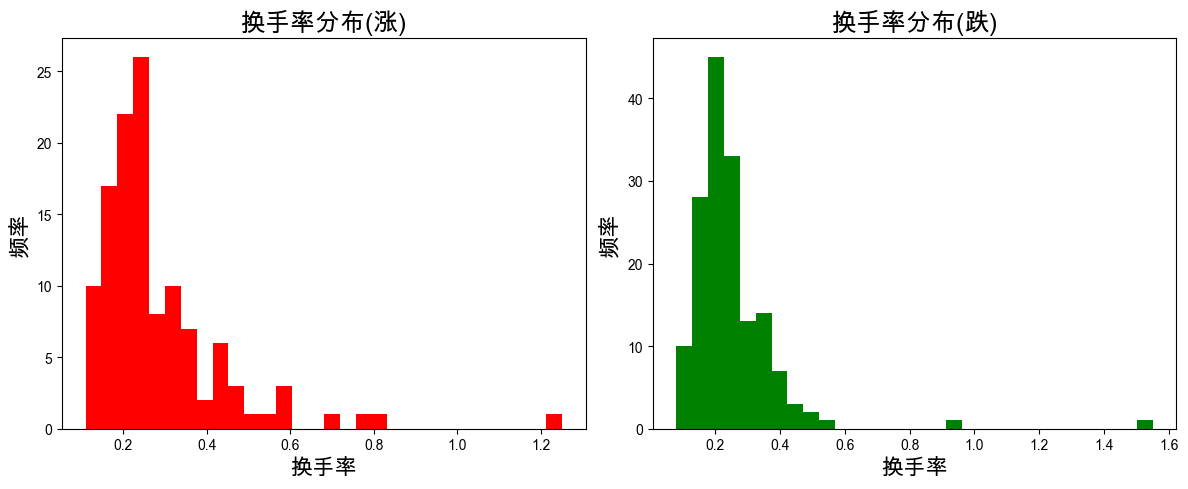

In [8]:
# 绘制双分布图
plt.figure(figsize=(12, 5))  # 定义画布大小

# 上涨时换手率分布
plt.subplot(1, 2, 1) # 第一个子图
plt.hist( x[y==1] , color='red', bins=30)  # 绘制直方图
plt.title('换手率分布(涨)', fontsize=18) # 设置标题
plt.xlabel('换手率', fontsize=16) # 设置x轴标签
plt.ylabel('频率', fontsize=16) # 设置y轴标签

# 下跌时换手率分布
plt.subplot(1, 2, 2)
plt.hist( x[y==0] , color='green', bins=30)  # 绘制直方图
plt.title('换手率分布(跌)', fontsize=18) # 设置标题
plt.xlabel('换手率', fontsize=16) # 设置x轴标签
plt.ylabel('频率', fontsize=16) # 设置y轴标签

plt.tight_layout() # 调整子图之间的间距
plt.show() # 显示图像

<a name='3'></a>
## 3 - 建模分析

逻辑回归模型的参数 $\boldsymbol{\theta} = (b, w)$ 的估计 $\hat{\boldsymbol{\theta}} = (\hat{b}, \hat{w})$ 可以通过最小化如下损失函数获得：
$$
J(\boldsymbol{\theta}) = - \frac{1}{n} \sum_{i=1}^{n} \{ y_i \log a_i + (1 - y_i) \log(1 - a_i) \},
$$
其中 $a_i = \sigma(z_i)$， $z_i = b+wx_{i}$.


梯度下降法步骤如下：

- **步骤 1. 随机选取参数初始值** $\boldsymbol{\theta} = (b^{(0)}, w^{(0)})$。
  
- **步骤 2. 基于当前参数值$\boldsymbol{\theta}^{(t)} = (b^{(t)}, w^{(t)})，$计算梯度**  
  
  \begin{aligned}
  \frac{\partial J}{\partial b} &= \frac{1}{n} \sum_{i=1}^{n} (a_{i} - y_{i}) \\
  \frac{\partial J}{\partial w} &= \frac{1}{n} \sum_{i=1}^{n} (a_{i} - y_{i}) x_{i} 
  \end{aligned}
  
  
- **步骤 3. 给定学习率$\alpha>0$，更新参数**  
  \begin{aligned}
  b^{(t+1)} &= b^{(t)} - \alpha  \frac{\partial J}{\partial b} \\
  w^{(t+1)} &= w^{(t)} - \alpha  \frac{\partial J}{\partial w}
  \end{aligned}
  
- **步骤 4. 回到步骤 2直到收敛** 


我们首先编写较为复杂的第二步和第三步的函数：

定义sigmoid函数：

In [13]:
def sigmoid(z):
    '''
    输入自变量z，输出sigmoid函数值
    '''
    
    result =   1/(1+np.exp(-z))
    return result

In [49]:
print('sigmoid 函数的输出为：', sigmoid(z = x[0]))
print('-'*80)
print('正确的输出应当为：')
print('sigmoid 函数的输出为： 0.610639233949222')

sigmoid 函数的输出为： 0.610639233949222
--------------------------------------------------------------------------------
正确的输出应当为：
sigmoid 函数的输出为： 0.610639233949222


在当前参数$\boldsymbol{\theta}^{(t)} = (b^{(t)}, w^{(t)})$下，计算损失函数。注意，这个函数在梯度下降法中不会用到，但我们用这个函数计算损失函数在当前参数下的函数值，帮助我们监控损失函数是否在参数更新过程中逐步下降。

In [47]:
def logit_loss(bt, wt, x, y):
    '''
    输入：
        截距项b、参数w、自变量x、因变量y
    输出：
        逻辑回归模型的损失函数值
    '''
    
    J =  # 初始化损失值
    n =   # 样本数量
    for i in range(n): # 遍历所有样本
        z =     # 计算z值
        a =     # 计算a值
        J =     # 累加损失函数
    J = - J / n   # 计算平均损失
    return J



In [53]:
# 设置测试数据
print('logit_loss 函数的输出为：', logit_loss(bt = 0, wt = 0, x = x[0:3], y= y[0:3]))
print('-'*80)
print('正确的输出应当为：')
print('logit_loss 函数的输出为： 0.6931471805599453。')

logit_loss 函数的输出为： 0.6931471805599453
--------------------------------------------------------------------------------
正确的输出应当为：
logit_loss 函数的输出为： 0.6931471805599453。


在当前参数$\boldsymbol{\theta}^{(t)} = (b^{(t)}, w^{(t)})$下，计算损失函数的梯度。

In [31]:
def get_grade(bt, wt, x, y):
    """
    输入：
        截距项b、参数w、自变量x、因变量y
    输出：
        b和w的梯度
    
    步骤 1. 初始化b和w的梯度
    步骤 2. 主循环，对所有xi，i=1,2,…,n：
            2.1：计算xi的sigmoid函数值
            2.2：计算xi的梯度
    步骤 3. 汇总梯度
    """
    
    grad_b =   # 初始化b的梯度
    grad_w =   # 初始化w的梯度
    n =   # 样本数量
    for i in range(n): # 遍历所有样本
        z =    # 计算z值
        a =    # 计算a值
        grad_b =  # 累加b的梯度
        grad_w =  # 累加w的梯度
    grad_b = grad_b / n # 计算b的平均梯度
    grad_w = grad_w / n # 计算w的平均梯度
    return grad_b, grad_w

In [56]:
print('b和w的梯度分别为：', get_grade(bt = 0, wt = 0, x = x, y = y))
print('-' * 80)
print('正确的输出应当为：')
print('b和w的梯度分别为： (0.0683453237410072, 0.009568345323741005)。')

b和w的梯度分别为： (0.0683453237410072, 0.009568345323741005)
--------------------------------------------------------------------------------
正确的输出应当为：
b和w的梯度分别为： (0.0683453237410072, 0.009568345323741005)。


我们利用已经构造好的函数，编写梯度下降法求解参数估计值的代码。

In [33]:
def GD_est(b, w, x, y, alpha=1e-1, tol=1e-8, max_iter=1000):
    """
    输入：
        参数b的初值b，参数w的初值w，自变量x、因变量y，学习率alpha（默认值为0.1），
        收敛条件tol（默认值为0.0001），最大迭代次数（默认值为1000）
    输出：
        b和w的优化结果
    
   主循环：
        2.1：依据步骤2，计算b和w的梯度
        2.2：依据步骤2，更新b和w
        2.3：检查收敛条件（更新前后参数是否有显著改变）
    """
    
    for i in range(max_iter): # 主循环
        grad_b, grad_w = get_grade(b, w, x, y) # 计算梯度
        
        # 更新参数
        b = 
        w = 
    
        # 检查收敛条件
        update = 
        if update < tol:
            break
    
    return b, w



In [61]:
print('b和w的优化结果分别为：', GD_est(b = 0, w = 0, x = x, y = y, alpha = 5, tol = 1e-10, max_iter = 5000))
print('-' * 80)
print('正确的输出应当为：')
print('b和w的优化结果分别为： (-0.6904925150918437, 1.5666598363213844)')

b和w的优化结果分别为： (-0.6904925150918437, 1.5666598363213844)
--------------------------------------------------------------------------------
正确的输出应当为：
b和w的优化结果分别为： (-0.6904925150918437, 1.5666598363213844)


In [9]:
alpha = 0.5 # 学习率
tol = 10**(-4) # 收敛条件
max_iter = 150 # 最大迭代次数

改变以上三个超参数，观察其对算法的影响

In [11]:
def get_grade_vec(par, aug_x, y):
    """
    输入：
        参数向量par、自变量x、因变量y
    输出：
        参数的梯度向量
    """
    n = len(y) # 样本数量
    z = aug_x @ par # 计算z
    A = sigmoid(z) # 计算A
    nabla_J = aug_x.T @ (A - y) / n   # 计算平均梯度
    return nabla_J
def GD_est_vec(par, x, y, alpha=10**(-1), tol=10**(-4), max_iter=1000):
    """
    输入：
        自变量x，因变量y，学习率alpha，收敛条件tol，最大迭代次数
    输出：
        b和w的优化结果
    
    步骤 1. 向自变量x中增加截距项，更改为aug_x
    步骤 2. 初始化参数向量par
    步骤 3. 主循环
            3.1：计算b和w的梯度
            3.2：基于学习率和梯度计算参数更新值
            3.3：更新参数
            3.4：检查退出条件
    """
    n = len(y) # 样本数量
    aug_x = np.concatenate((np.ones((n,1)),x), axis = 1) # 加入截距项
    
    for _ in range(max_iter): # 主循环
        nabla_J = get_grade_vec(par, aug_x, y) # 计算梯度
        update = alpha* nabla_J # 计算更新值
        par -= update # 更新参数

        if np.linalg.norm(update) < tol: # 收敛判定
            break
        
    return par  
 

In [14]:
from matplotlib.animation import FuncAnimation # 用于展示画图过程
from IPython.display import display_html
display_html("""
<button onclick="$(this).closest('.cell').find('.input, .output_stderr, .output_error').toggle()">显示代码</button>
<script>
    // 默认隐藏逻辑
    (function(){
        // 通过脚本自身定位到当前单元格
        const script = document.currentScript;
        const cell = $(script).closest('.cell');
        // 隐藏输入区域并修改按钮文字
        cell.find('.input, .output_stderr, .output_error').hide();
        cell.find('button').text('显示\隐藏代码'); // 初始化按钮文字
    })();
</script>
""", raw=True)

def logit_loss_trace(par, x, y):
    z = x @ par
    A = sigmoid(z)
    loss = -np.mean(y * np.log(A + 1e-15) + (1 - y) * np.log(1 - A + 1e-15))  # 添加小常数避免log(0)
    return loss

def GD_est_trace(x,y, alpha=10**(-1), tol=10**(-4), max_iter=1000):
    n = len(y)
    aug_x = np.concatenate((np.ones((n,1)),x), axis = 1) # 加入截距项

    par = np.ones((2,1))
    update = np.ones((2,1))
    
    # 初始化历史记录（包含初始参数）
    history = [par.copy()]
    
    iter_index = 0
    while iter_index < max_iter and np.linalg.norm(update) > tol:
        z = aug_x @ par
        A = sigmoid(z)
        
        nabla_J = aug_x.T @ (A - y) / n
        
        update = alpha* nabla_J
        par -= update
        
        # 记录更新后的参数
        history.append(par.copy())
        iter_index += 1
        
    return par, np.array(history)

# 开启交互模式，展示动图
%matplotlib notebook

# 重新设置自变量与因变量
x = df['换手率(%)'].T.values.reshape(-1, 1)
y = (df['涨跌幅(%)']>0).astype(int).T.values.reshape(-1, 1)

# 运行BGD算法并获取历史参数
par, history = GD_est_trace(x, y, alpha, tol, max_iter)
trajectory = history.squeeze()

# 计算 Loss 轨迹
aug_x = np.concatenate((np.ones((len(x),1)),x), axis = 1)
loss_history = [logit_loss_trace(par.reshape(-1, 1), aug_x, y) for par in trajectory]

# 创建画布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 创建参数空间的网格
theta0_range = np.linspace(-4, 4, 100)  # 截距范围
theta1_range = np.linspace(-4, 4, 100)  # 特征系数范围
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range) # 创建网格
Loss = np.zeros_like(Theta0) # 初始化 Loss 矩阵

# 计算损失函数在网格上的值
for i in range(Theta0.shape[0]):
    for j in range(Theta0.shape[1]):
        par = np.array([[Theta0[i, j]], [Theta1[i, j]]])
        Loss[i, j] = logit_loss_trace(par, aug_x, y)

# 初始化左侧图（参数轨迹）
contour = ax1.contourf(Theta0, Theta1, Loss, levels=40, cmap='coolwarm')
ax1.clabel(contour, inline=True, fontsize=8)
fig.colorbar(contour, ax=ax1)

ax1.set_xlabel('截距项')
ax1.set_ylabel('特征参数')
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.set_title('Logit 模型参数轨迹')
ax1.grid(ls='--', alpha=0.5)

# 初始化右侧图（Loss 轨迹）
ax2.set_xlabel('迭代次数')
ax2.set_ylabel('Loss 值')
ax2.set_title('Loss 随迭代次数的变化')
ax2.grid(ls='--', alpha=0.5)

# 初始化轨迹线和点
param_line, = ax1.plot([], [], 'b-o', markersize=3, linewidth=1, label='参数轨迹')
loss_line, = ax2.plot([], [], 'r-', linewidth=1.5, label='Loss 轨迹')

# 添加图例
ax1.legend()
ax2.legend()

# 更新函数
def update(frame):
    # 更新左侧图（参数轨迹）
    param_line.set_data(trajectory[:frame, 0], trajectory[:frame, 1])
    
    # 更新右侧图（Loss 轨迹）
    loss_line.set_data(np.arange(frame), loss_history[:frame])
    
    # 动态调整右侧图的 x 轴范围
    ax2.set_xlim(0, len(trajectory))
    ax2.set_ylim(min(loss_history) - 0.1, max(loss_history) + 0.1)
    
    # 更新标题
    ax1.set_title(f'参数轨迹 (迭代 {frame})')
    ax2.set_title(f'Loss 轨迹 (迭代 {frame})')
    
    return param_line, loss_line

# 创建动画
ani = FuncAnimation(fig, update, frames=len(trajectory), interval=100, blit=True, repeat=False)

# 显示动画
plt.tight_layout()
plt.show()

显示代码

<IPython.core.display.Javascript object>